In [35]:
pip install statsmodels 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import statsmodels as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## T1. Load Dataset

In [3]:
df=pd.read_csv(r"accord_sedan.csv")
df.head()

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


In [4]:
df.describe()

,price,mileage,year
count,417.000000,417.000000,417.0
mean,12084.242206,89725.779376,2006.0
std,2061.430034,25957.872271,0.0
min,6900.000000,19160.000000,2006.0
25%,10779.000000,71844.000000,2006.0
50%,11995.000000,89900.000000,2006.0
75%,13000.000000,106705.000000,2006.0
max,18995.000000,149269.000000,2006.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         417 non-null    int64 
 1   mileage       417 non-null    int64 
 2   year          417 non-null    int64 
 3   trim          417 non-null    object
 4   engine        417 non-null    object
 5   transmission  417 non-null    object
dtypes: int64(3), object(3)
memory usage: 19.7+ KB


## T2 & T3. Plot suitable graphs to show the distributions and help indicate outliers of "price" and "mileage" (e.g. with boxplots) and their joint distribution (e.g. with a scatterplot) & (Visually) identify the outliers.

<Figure size 640x480 with 0 Axes>

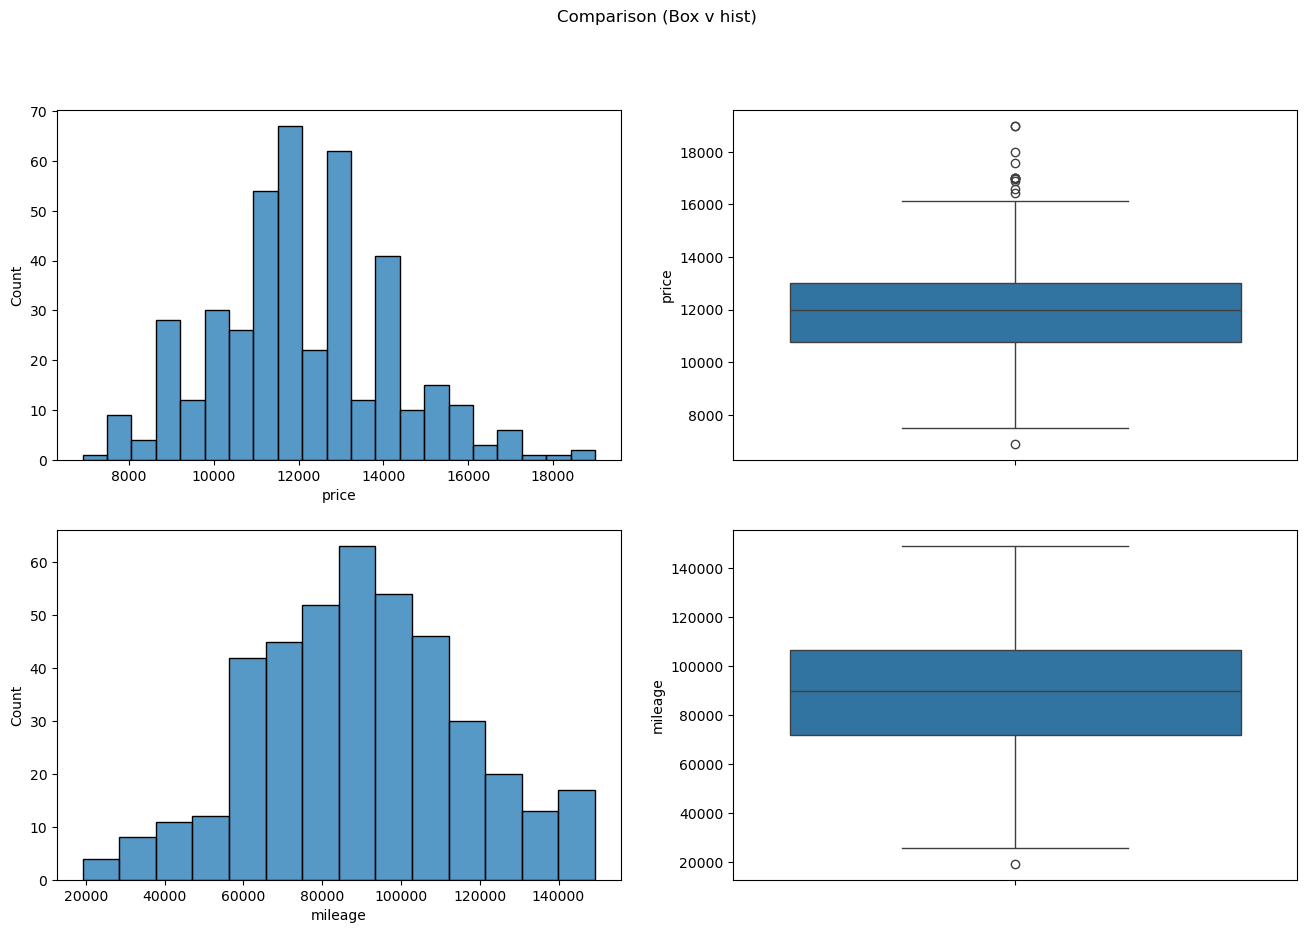

In [6]:
plt.tight_layout()


plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.histplot(data=df,x='price')
plt.subplot(2,2,2)
sns.boxplot(data=df,y='price')

plt.subplot(2,2,3)
sns.histplot(data=df,x='mileage')
plt.subplot(2,2,4)
sns.boxplot(data=df,y='mileage')

plt.suptitle("Comparison (Box v hist)")
plt.show()

In [49]:
# sns.jointplot(data=df,x=a

## T4. Add two new columns to the dataframe called isOutlierPrice, isOutlierMileage. For the price column, calculate the mean and standard deviation. Use the standard deviation and mean to try to identify outliers for these two variables and mark them with a 1 in the isOutlierPrice and isOutlierMilage columns.

In [7]:
df.price.std()

2061.430033967955

In [8]:
new_p=[]
mean_p = df.price.mean()

for i in df.price:
    if(i-mean_p> np.abs(2*df.price.std())):
        new_p.append(1)
    else:
        new_p.append(0)

df["isOutlierPrice"]= new_p


new_m=[]
mean_m = df.mileage.mean()
for i in df.mileage:
    if(i-mean_m> np.abs(2*df.mileage.std())):
        new_m.append(1)
    else:
        new_m.append(0)
df["isOutlierMilage"]=new_m

df

,price,mileage,year,trim,engine,transmission,isOutlierPrice,isOutlierMilage
0,14995,67697,2006,ex,4 Cyl,Manual,0,0
1,11988,73738,2006,ex,4 Cyl,Manual,0,0
2,11999,80313,2006,lx,4 Cyl,Automatic,0,0
3,12995,86096,2006,lx,4 Cyl,Automatic,0,0
4,11333,79607,2006,lx,4 Cyl,Automatic,0,0
...,...,...,...,...,...,...,...,...
412,12456,67564,2006,lx,4 Cyl,Automatic,0,0
413,10995,69775,2006,ex,4 Cyl,Automatic,0,0
414,16000,77997,2006,exl,4 Cyl,Automatic,0,0
415,14700,61892,2006,ex,4 Cyl,Automatic,0,0


## T5. Show these "outliers" using a different colour (hue) in the plot. Are these what you would consider outliers? Observe whether they are the same as you would mark them.

<Axes: xlabel='price', ylabel='mileage'>

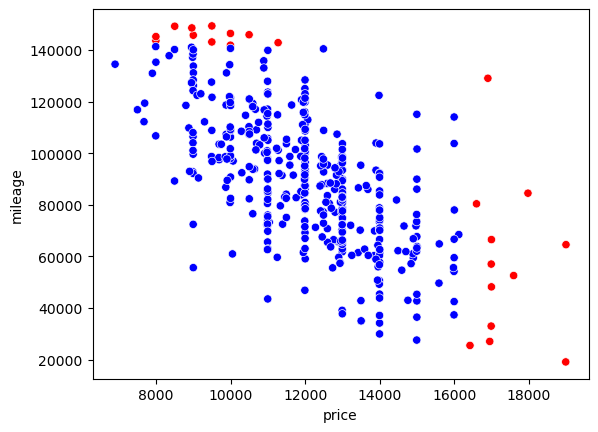

In [17]:
p={(0,0):'blue',(1,0):'red',(0,1):'red'}
sns.scatterplot(data=df,y='mileage',x='price',hue=df[['isOutlierMilage', 'isOutlierPrice']].apply(tuple, axis=1),palette=p,legend=None)